# 02. 워드투벡터(Word2Vec)

: 단어 벡터 간 유의미한 유사도를 반영할 수 있도록 단어의 의미를 수치화 할 수 있는 대표적인 방법 


1. 희소 표현(Sparse Representation)
- 각 단어 벡터간 유의미한 유사성 표현할 수 없음 


2. 분산 표현(Distributed Representation)
- 희소 표현의 단점을 보완하여 다차원 공간에 벡터화하는 방법을 사용함 
- 분산 표현을 이용하여 단어 간 의미적 유사성을 벡터화하는 작업: word embedding
- 분포 가설, 즉 '비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다'는 가정 하에 만들어진 표현 방법 
- 분포 가설을 이용하여 텍스트를 학습하고, 단어의 의미를 벡터의 여러 차원에 분산하여 표현함 

즉,
- 희소 표현: 각 차원이 분리된 표현 방법
- 분산 표현: 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현 


※ Word2Vec 
- 학습 방식: CBOW와 Skip-Gram이 있음 
- 딥러닝 모델이 아니라 은닉층이 1개인 얕은 신경망(shallow neural network)임 
- 은닉층에는 활성 함수가 없고 룩업 테이블 연산을 하는 투사층(projection layer)가 있음 


3. CBOW(Continous Bag of Words) 
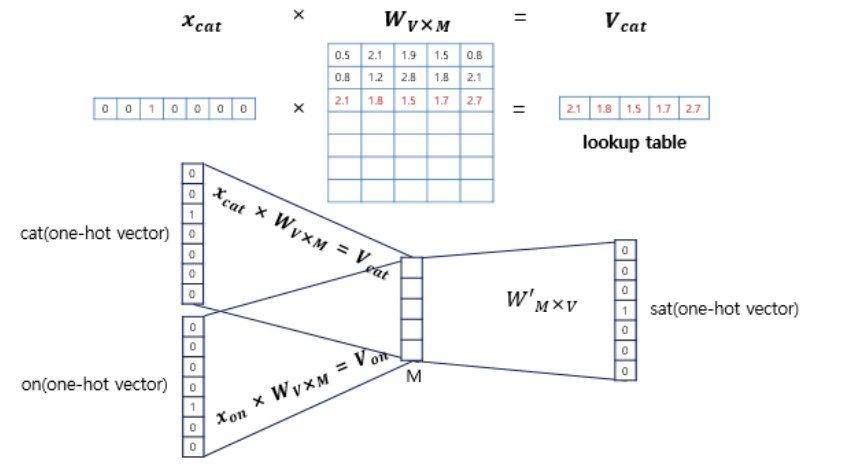
- 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법 
- 윈도우(window): 중심 단어를 예측하기 위해 앞, 뒤로 확인할 단어를 결정하는 범위 
- 윈도우 크기가 n이면, 주변 단어 개수는 2n 
-슬라이딩 윈도우(sliding window): 윈도우 크기가 정해지면 우니도우를 옆으로 움직여서 주변, 중심 단어의 선택을 변경해가며 학습을 위한 데이터 셋을 만드는 방법 
- 동작 메커니즘
    - 투사층의 크기(M)은 임베딩하고 난 벡터의 차원 
    - 입력층과 투사층 사이의 가중치: W = V*M
    - 투사층과 출력층 사이의 가중치: W' = M*V
    - (V: 단어 집합의 크기)
    - 중심 단어를 더 정확히 맞추기 위해 가중치 학습해가는 구조 
    - 주변 단어의 원-핫 벡터와 W를 곱함 -> 곱한 결과의 벡터들이 투사층에서 만나 평균 벡터를 구하게 됨 -> 평균 벡터와 W'를 곱함  
- softmax 함수를 지나므로 벡터의 각 원소들은 0~1 사이의 실수를 가지며 이는 j번째 단어가 중심 단어일 확률을 나타냄: 스코어 벡터(score vector) 
- 소코어 벡터와 중심 단어의 원-핫 벡터의 오차를 줄이기 위해 cross-entropy 손실 함수 사용함 

4. Skip-gram
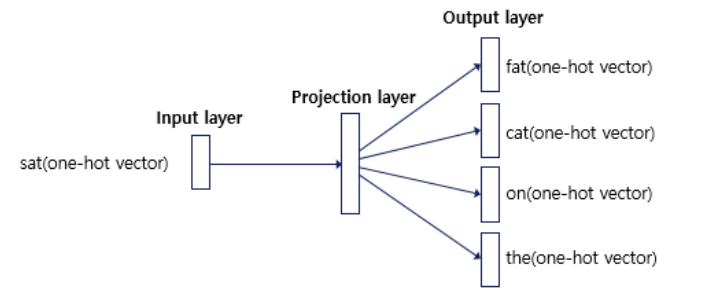
- 중심 단어에서 주변 단어를 예측함 -> 벡터들의 평균을 구하진 않음 
- 성능이 CBOW보다 좋음 

5. NNLM Vs. Word2Vec
- 예측 대상
    - NNLM: 다음 단어를 예측 -> 예측 단어 이전 단어들만 참고 
    - Word2Vec: 중심 단어를 예측(워드 임베딩이 목적이므로)  -> 예측 단어 전, 후로 모두 참고 
- 구조
    - Word2Vec: 은닉층이 없음 
- 학습 속도 
    - NNLM: (𝑛 × 𝑚) + (𝑛 × 𝑚 × ℎ) + (ℎ × 𝑉 )
    - Word2Vec: (𝑛 × 𝑚) + (𝑚 × 𝑙𝑜𝑔(𝑉 ))   -> 속도가 훨씬 빠름 